<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-знакомство" data-toc-modified-id="Загрузка-и-знакомство-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и знакомство</a></span></li><li><span><a href="#Статистики" data-toc-modified-id="Статистики-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Статистики</a></span></li><li><span><a href="#Корелляционная-матрица" data-toc-modified-id="Корелляционная-матрица-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Корелляционная матрица</a></span></li><li><span><a href="#Сотрудники-в-каждом-департаменте" data-toc-modified-id="Сотрудники-в-каждом-департаменте-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Сотрудники в каждом департаменте</a></span></li><li><span><a href="#Распределение-сотрудников-по-зарплатам" data-toc-modified-id="Распределение-сотрудников-по-зарплатам-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Распределение сотрудников по зарплатам</a></span></li><li><span><a href="#Распределение-сотрудников-по-зарплатам-по-отделам" data-toc-modified-id="Распределение-сотрудников-по-зарплатам-по-отделам-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Распределение сотрудников по зарплатам по отделам</a></span></li><li><span><a href="#Кто-больше-времени-проводит-на-работе?" data-toc-modified-id="Кто-больше-времени-проводит-на-работе?-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Кто больше времени проводит на работе?</a></span></li><li><span><a href="#Уволившиеся-и-не-уволившиеся" data-toc-modified-id="Уволившиеся-и-не-уволившиеся-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Уволившиеся и не уволившиеся</a></span></li><li><span><a href="#Уволится-ли-сотрудник?" data-toc-modified-id="Уволится-ли-сотрудник?-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Уволится ли сотрудник?</a></span></li></ul></div>

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats as st
from scipy.stats import normaltest
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import ttest_rel

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

## Загрузка и знакомство 

In [2]:
hr_df = pd.read_csv('HR.csv')
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


__Признаки:__  
1. satisfaction_level  - Уровень удовлетворенности работой  
2. last_evaluation - Время с момента последней оценки в годах  
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах  
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником  
7. left - уволился ли сотрудник  
8. promotion_last_5years - повышался ли сотрудник за последние пять лет 
9. department - отдел в котором работает сотрудник  
10. salary - относительный уровень зарплаты

In [3]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Итак, перед нами первоклассный датафрейм, который вроде как даже не нужно чистить от мусора и неадекватных значений, заполнять пропуски и так далее. И в котором даже почти все столбцы представлены числовыми переменными. Посмотрим, что мы сможем из этого извлечь.

## Статистики

Вытащим из фрейма все количественные переменные, для которых и имеет смысл считать статистики

In [4]:
hr_numerical = hr_df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]
hr_numerical.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


ок, найдем и прочие характеристики, которые не выдает describe 

In [5]:
hr_numerical.mode(axis=0)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.1,0.55,4.0,135,3.0
1,NaN,NaN,NaN,156,NaN


Хмм, уже здесь мы видим первый подвох - по идее мода не должна резко отличаться от среднего значения, но такое мы наблюдаем далеко не всегда! Если судить по среднему, то работники в целом довольны работой, но, при этом, самая часто встречающаяся оценка здесь - это 0.1. Требует дальнейшего исследования. При этом в количестве проектов, стаже работы в годах - все идеально, среднее количество часов отличается от моды тоже почти в два раза, а время с момента оценки в принципе согласуется. 

In [6]:
hr_numerical.median(axis=0)

satisfaction_level        0.64
last_evaluation           0.72
number_project            4.00
average_montly_hours    200.00
time_spend_company        3.00
dtype: float64

Ну, собственно, медиана у нас 0.5 квантиль, так что можно было бы отдельно и не выводить, но раз уж функция есть - отчего бы не использовать!

## Корелляционная матрица

In [7]:
hr_numerical.corr(method='spearman')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154
number_project,0.005786,0.350399,1.000000,0.397855,0.251971
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000


In [8]:
hr_numerical.corr(method='kendall')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.113865,0.022077,0.051126,-0.110005
last_evaluation,0.113865,1.000000,0.266267,0.235374,0.118842
number_project,0.022077,0.266267,1.000000,0.306987,0.195025
average_montly_hours,0.051126,0.235374,0.306987,1.000000,0.119466
time_spend_company,-0.110005,0.118842,0.195025,0.119466,1.000000


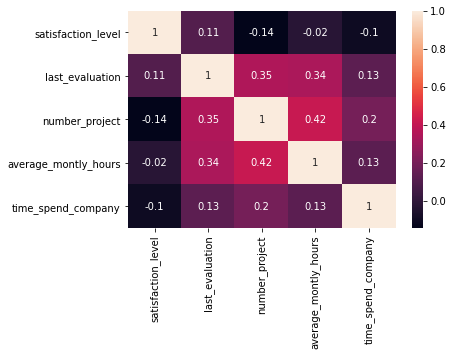

In [9]:
hm = sns.heatmap(hr_numerical.corr(), cbar=True, annot=True)

В целом мы видим слабую отрицательную корреляцию между уровнем удовлетворенности и количеством законченных проектов (что вполне логично), довольно сильная положительная корреляция между годами работы и количеством проектов (что еще более ожидаемо, она же самая большая)и умеренная положительная корреляция между количеством проектов и временем с последней оценки. Наименьшую корреляцию мы созерцаем между уровнем удовлетворения и количеством лет, проведенных в компании.

## Сотрудники в каждом департаменте

In [10]:
from more_itertools import unique_everseen
department_list = sorted(list(unique_everseen(hr_df['department'])))
department_list

['IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical']

In [11]:
department_dict = {}
for dept in department_list:
    department_dict.setdefault(dept, len(hr_df[hr_df['department'] == dept]))
department_dict

{'IT': 1227,
 'RandD': 787,
 'accounting': 767,
 'hr': 739,
 'management': 630,
 'marketing': 858,
 'product_mng': 902,
 'sales': 4140,
 'support': 2229,
 'technical': 2720}

 ## Распределение сотрудников по зарплатам

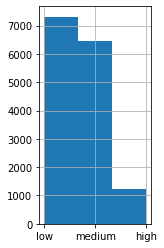

In [12]:
pub_list = set(list(hr_df['salary']))
h = hr_df['salary'].T.hist(figsize=(2,4), bins=len(pub_list))

## Распределение сотрудников по зарплатам по отделам

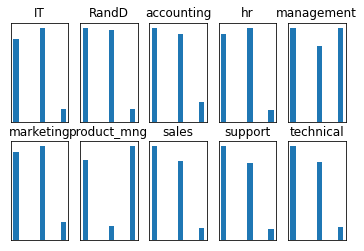

In [13]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=5)
n = 0
for ax in axes.flat:
    ax.set(title=department_list[n], xticks=[], yticks=[])
    ax.hist(hr_df[hr_df['department'] == department_list[n]]['salary'], alpha=1)
    n += 1
plt.show()

## Кто больше времени проводит на работе?

Для начала подготовим данные, убрав из фрейма все, что нам не нужно

In [14]:
hr_workhard = hr_df[['average_montly_hours', 'salary']]
hr_worklow = hr_workhard[hr_workhard['salary'] == 'low']
hr_workhigh = hr_workhard[hr_workhard['salary'] == 'high']

перед тем, как что-то делать, глянем что-ли на выбросы и общие параметры


<AxesSubplot:>

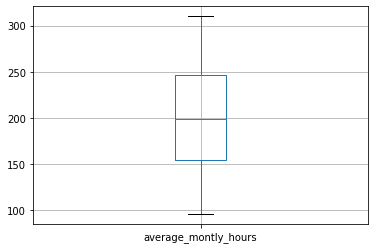

In [15]:
hr_worklow.boxplot(column=['average_montly_hours'])

<AxesSubplot:>

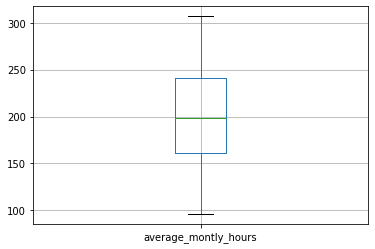

In [16]:
hr_workhigh.boxplot(column=['average_montly_hours'])

In [17]:
hr_worklow.describe()

,average_montly_hours
count,7316.000000
mean,200.996583
std,50.832214
min,96.000000
25%,155.000000
50%,199.000000
75%,246.000000
max,310.000000


In [18]:
hr_worklow.mode(axis=0)

,average_montly_hours,salary
0,135,low


In [19]:
hr_workhigh.describe()

,average_montly_hours
count,1237.000000
mean,199.867421
std,47.710446
min,96.000000
25%,161.000000
50%,199.000000
75%,241.000000
max,307.000000


In [20]:
hr_workhigh.mode(axis=0)

,average_montly_hours,salary
0,180,high


Ну, собственно, отличается у нас только мода, остальные статистики либо близки, либо совпадают. Гланем на распределение и проведем тест на нормальность.

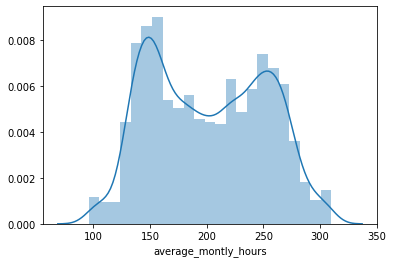

In [21]:
sns_plot = sns.distplot(hr_worklow['average_montly_hours'])
fig = sns_plot.get_figure()

In [22]:
data0 = hr_worklow['average_montly_hours']
stat = anderson(data0, dist='norm')
stat

AndersonResult(statistic=106.07839458442504, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

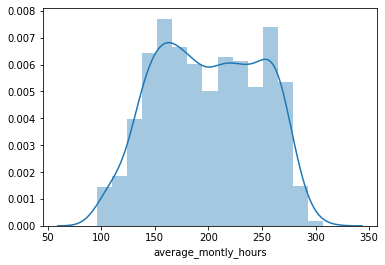

In [23]:
sns_plot = sns.distplot(hr_workhigh['average_montly_hours'])
fig = sns_plot.get_figure()

In [24]:
data1 = hr_workhigh['average_montly_hours']
stat = anderson(data1, dist='norm')
stat

AndersonResult(statistic=10.628515275333484, critical_values=array([0.574, 0.654, 0.784, 0.915, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

В принципе уже достаточно информации, что бы сделать все необходимые выводы. Распределения в обоих случаях не являются нормальными, при этом к нормальному таки ближе оно у тех, у кого з/п выше. Кроме того, работники с низкой з/п предпочитают работать более экстремально - или мало часов или много, среди работников с высокой зп куда выше доля тех, кто работает среднее число часов.

Прогоним это дело через критерий Уэлча, позволяющий установить наличие значимой разницы в средних двух совокупностей, из которых извлечены выборки. 

In [25]:
st.ttest_ind(data0, data1, equal_var = False)

Ttest_indResult(statistic=0.7624331665385475, pvalue=0.4459045542257889)

Итак, мы видим, что, ожидаемо, нулевая гипотеза отвергается и между средними совокупностями есть статистически значимая разница в пользу тех, кто получает более высокую зарплату. 

## Уволившиеся и не уволившиеся

In [26]:
hr_left = hr_df[hr_df['left'] == 1]
hr_notleft = hr_df[hr_df['left'] != 1]

Доля сотрудников с повышением среди уволившихся

In [27]:
hr_left_up = hr_left[hr_left['promotion_last_5years'] == 1]
up = round((len(hr_left_up)/len(hr_left))*100, 3)
print(f"Среди уволившихся получили повышение всего {up}%.")

Среди уволившихся получили повышение всего 0.532%.


In [28]:
hr_notleft_up = hr_notleft[hr_notleft['promotion_last_5years'] == 1]
up = round((len(hr_notleft_up)/len(hr_notleft))*100, 3)
print(f"Среди неуволившихся получили повышение {up}%.")

Среди неуволившихся получили повышение 2.625%.


In [29]:
hr_left['satisfaction_level'].mean() 

0.44009801176140917

In [30]:
hr_notleft['satisfaction_level'].mean() 

0.666809590479516

Средний уровень удовлетворенности среди неуволившихся, ожидаемо, выше аж ровно на треть

In [31]:
hr_left['number_project'].mean() 

3.8555026603192384

In [32]:
hr_notleft['number_project'].mean() 

3.786664333216661

А вот среднее количество выполненных проектов, оказывается, чуть больше у уволившихся!

## Уволится ли сотрудник?

Проведем предварительные исследования

In [38]:
X = hr_df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]
y = hr_df['left']

Text(0, 0.5, 'left')

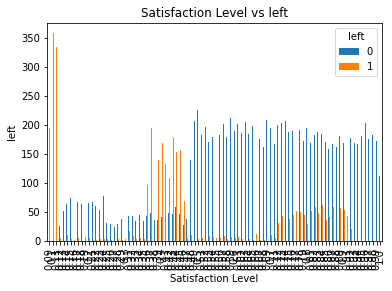

In [39]:
%matplotlib inline
pd.crosstab(X.satisfaction_level,y).plot(kind='bar')
plt.title('Satisfaction Level vs left')
plt.xlabel('Satisfaction Level')
plt.ylabel('left')

Очень интересная картина - все, чье довольство минимально - уволились, потом пик увольнений на довольстве ниже среднего и наконец - еще один пик - на довольстве выше среднего

Text(0, 0.5, 'left')

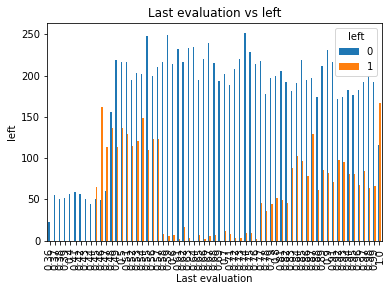

In [40]:
pd.crosstab(X.last_evaluation,y).plot(kind='bar')
plt.title('Last evaluation vs left')
plt.xlabel('Last evaluation')
plt.ylabel('left')

Text(0, 0.5, 'left')

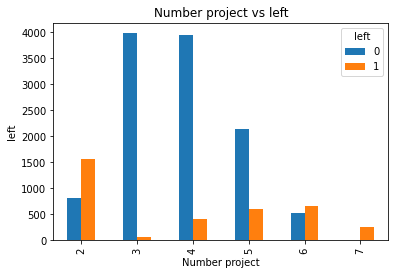

In [41]:
pd.crosstab(X.number_project,y).plot(kind='bar')
plt.title('Number project vs left')
plt.xlabel('Number project')
plt.ylabel('left')

Text(0, 0.5, 'left')

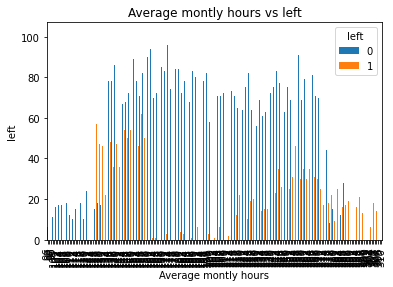

In [42]:
pd.crosstab(X.average_montly_hours,y).plot(kind='bar')
plt.title('Average montly hours vs left')
plt.xlabel('Average montly hours')
plt.ylabel('left')

Text(0, 0.5, 'left')

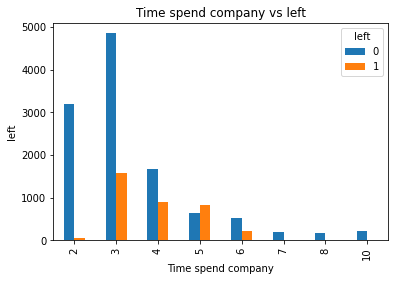

In [43]:
pd.crosstab(X.time_spend_company,y).plot(kind='bar')
plt.title('Time spend company vs left')
plt.xlabel('Time spend company')
plt.ylabel('left')

Итак, мы получили довольно нетривиальную картину в которой все факторы являются существенными для прогноза. При этом есть схожесть разве что в Average montly hours и Last evaluation.

In [44]:
print(len(hr_left), len(hr_notleft)) 

3571 11428


Выборка не очень сбалансирована - число уволившихся почти в три раза меньше, чем неуволившихся. В принципе с дисбалансом 4:1 - 3:1 уже могут возникнуть проблемы. Попробуем это исправить.

Насколько мне известно, существует три основных подхода к балансированию классов:
* Балансирование через веса в самой модели
* Оверсемплинг меньшего класса
* Удаление лишних примеров в большем классе  
Попробуем эти методы

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Прогоним для начала sm.Logit

In [51]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.459889
         Iterations 6
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.162     
Dependent Variable:   left              AIC:               13805.7518
Date:                 2021-01-14 16:37  BIC:               13843.8305
No. Observations:     14999             Log-Likelihood:    -6897.9   
Df Model:             4                 LL-Null:           -8232.3   
Df Residuals:         14994             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
satisfaction_level   -4.0892   0.0875 -46.7346 0.0000 -4.2607 -3.9177
last_evaluation 

Мы видим, что P-значения для всех переменных меньше 0.005. Запустим LogisticRegression из модуля sklearn с поправкой на несбалансированность выборки.

In [55]:
LRreg = LogisticRegression(class_weight='balanced', solver ='newton-cg').fit(X_train, y_train)
LRy_pred = LRreg.predict(X_test)
print('Точность логистической регрессии: {:.2f}'.format(LRreg.score(X_test, y_test)))

Точность логистической регрессии: 0.75


In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, LRy_pred)
print(confusion_matrix)

[[2544  884]
 [ 251  821]]


В общем картина какая-то безрадостная

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, LRy_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      3428
           1       0.48      0.77      0.59      1072

    accuracy                           0.75      4500
   macro avg       0.70      0.75      0.70      4500
weighted avg       0.81      0.75      0.76      4500



Здесь  
* Точность является соотношением tp/(tp + fp), где tp является числом верно-положительных, а fp — числом ложно-положительных. Точность — это интуитивно понятная способность классификатора не помечать выборку как положительную, если она отрицательна.

* Полнота— это пропорция tp/(tp +fn), где tp представляет число верно-положительных результатов, а fn — число ложно-отрицательных. Полнота является интуитивно понятной способностью классификатора находить все положительные выборки.

* Показатель F-бета можно интерпретировать как взвешенное гармоническое среднее точности и полноты, где лучшим значением этого показателя будет 1, а худшим 0. Показатель F-бета определяет, насколько значимость полноты больше, чем точности, опираясь на фактор бета. Например, beta = 1.0 означает, что полнота и точность равно важны.

* Поддержка — это число вхождений каждого класса в y_test

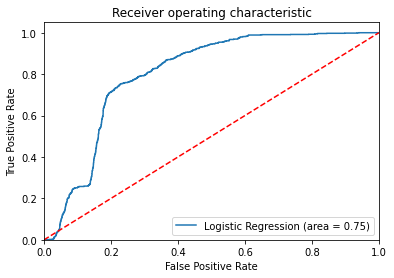

In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LRreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LRreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Примечание, что бы мне самому не забыть, что это за штука)
Кривая рабочей характеристики приёмника (ROC) является ещё одним инструментом, используемым с бинарными классификаторами. Пунктирная линия представляет ROC-кривую полностью случайного классификатора. Хороший классификатор остаётся от неё максимально далеко (по направлению к верхнему левому углу).

В общем, как мы видим, стандартный подход не очень эффективен, возможно нужно дольше и лучше настраивать модель или же испольщовать оверсемплинг или удаление лишних данных